In [10]:
import pandas as pd

# Cargar el archivo CSV (ajuste el nombre si es diferente)
df = pd.read_csv("CHIRPS_mensual_EC_HUILA.csv", parse_dates=["time"])

# Revisar las primeras filas
df.head()


,time,precip_ec_mm,precip_hu_mm
0,1981-01-01,84.42557,66.79862
1,1981-02-01,178.82245,124.00929
2,1981-03-01,203.54701,159.06840
3,1981-04-01,350.76382,242.47266
4,1981-05-01,397.30255,306.78980


**Completitud**

In [11]:
# 1.1 COMPLETITUD

print("=== 1.1 COMPLETITUD ===\n")

# Conteo de valores faltantes por columna
missing_count = df.isna().sum()
print("Valores faltantes por columna:")
print(missing_count, "\n")

# Porcentaje de completitud (no nulos)
completeness_pct = (1 - df.isna().mean()) * 100
print("Porcentaje de completitud por columna (%):")
print(completeness_pct, "\n")

# Número total de registros (filas)
print("Número total de registros:", len(df))


=== 1.1 COMPLETITUD ===

Valores faltantes por columna:
time            0
precip_ec_mm    0
precip_hu_mm    0
dtype: int64 

Porcentaje de completitud por columna (%):
time            100.0
precip_ec_mm    100.0
precip_hu_mm    100.0
dtype: float64 

Número total de registros: 537


In [12]:
# Aseguramos que la columna time sea el índice temporal
df = df.set_index("time").sort_index()

# Rango completo de fechas mensuales entre el mínimo y máximo
full_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq="MS")

# Fechas que faltan en el DataFrame
missing_dates = full_range.difference(df.index)

print("Fechas (meses) faltantes en la serie temporal:")
print(missing_dates if len(missing_dates) > 0 else "No hay meses faltantes")


Fechas (meses) faltantes en la serie temporal:
No hay meses faltantes


In [13]:
print("=== 1.2 CONSISTENCIA ===\n")

# 1. Valores negativos (no deberían existir)
negatives = (df < 0).sum()
print("Valores negativos por columna:")
print(negatives, "\n")

# 2. Estadísticas descriptivas (para ver rangos, medias, picos)
print("Estadísticos descriptivos:")
print(df.describe(), "\n")

# 3. Valores fuera de rango climatológico CHIRPS (>2000 mm/mes es sospechoso)
unrealistic = (df > 2000).sum()
print("Valores >2000 mm/mes (posibles errores):")
print(unrealistic, "\n")

# 4. Cambios abruptos mes a mes
diff = df.diff().abs()
print("Cambio mensual máximo por columna:")
print(diff.max(), "\n")

# 5. Outliers según IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

print("Número de outliers potenciales por IQR:")
print(outliers)


=== 1.2 CONSISTENCIA ===

Valores negativos por columna:
precip_ec_mm    0
precip_hu_mm    0
dtype: int64 

Estadísticos descriptivos:
       precip_ec_mm  precip_hu_mm
count    537.000000    537.000000
mean     221.599525    161.141862
std       83.990548     59.360131
min       38.438072     40.024730
25%      157.524700    116.600720
50%      217.723100    156.070220
75%      278.550320    201.523180
max      572.633540    447.293670 

Valores >2000 mm/mes (posibles errores):
precip_ec_mm    0
precip_hu_mm    0
dtype: int64 

Cambio mensual máximo por columna:
precip_ec_mm    390.51319
precip_hu_mm    297.40131
dtype: float64 

Número de outliers potenciales por IQR:
precip_ec_mm    2
precip_hu_mm    3
dtype: int64


In [14]:
print("=== 1.3 CLARIDAD ===\n")

# 1. Asegurar índice temporal SI EXISTE, de lo contrario continuar
if "time" in df.columns:
    df = df.set_index("time")

# Asegurar que el índice esté ordenado
df = df.sort_index()

# 2. Información del índice
print("Primeras fechas:", df.index.min())
print("Últimas fechas:", df.index.max(), "\n")

print("Tipo de índice:", type(df.index))
print("Frecuencia inferida:", pd.infer_freq(df.index), "\n")

# 3. Tipos de datos
print("Tipos de datos por columna:")
print(df.dtypes, "\n")

# 4. Nombres de columnas
print("Columnas:")
print(list(df.columns), "\n")

# 5. Duplicados
print("Filas duplicadas:", df.duplicated().sum())
print("Columnas duplicadas:", df.columns.duplicated().sum())


=== 1.3 CLARIDAD ===

Primeras fechas: 1981-01-01 00:00:00
Últimas fechas: 2025-09-01 00:00:00 

Tipo de índice: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
Frecuencia inferida: MS 

Tipos de datos por columna:
precip_ec_mm    float64
precip_hu_mm    float64
dtype: object 

Columnas:
['precip_ec_mm', 'precip_hu_mm'] 

Filas duplicadas: 0
Columnas duplicadas: 0


In [15]:
print("=== 1.4 FORMATO ===\n")

# 1. Verificar columnas sospechosas (p. ej. "Unnamed: 0")
extra_cols = [col for col in df.columns if "Unnamed" in col or col.strip() == ""]
print("Columnas sospechosas:", extra_cols if extra_cols else "No se identificaron columnas sospechosas", "\n")

# 2. Verificar que todos los valores sean numéricos
numeric_check = df.applymap(lambda x: isinstance(x, (int, float))).all()
print("¿Todas las columnas contienen solo valores numéricos?")
print(numeric_check, "\n")

# 3. Verificar formato del índice
print("Tipo del índice:", type(df.index))
print("Frecuencia inferida del índice:", pd.infer_freq(df.index), "\n")

# 4. Verificar orden cronológico del índice
print("¿Índice en orden cronológico ascendente?:", df.index.is_monotonic_increasing, "\n")

# 5. Revisar que no existan caracteres o strings incrustados en columnas numéricas
string_values = df.applymap(lambda x: isinstance(x, str)).sum()
print("Conteo de strings por columna (debería ser 0):")
print(string_values, "\n")

# 6. Validar que no existan espacios, tildes o formatos irregulares en nombres de columnas
clean_colnames = all(col.isidentifier() for col in df.columns)
print("¿Nombres de columnas con formato adecuado?:", clean_colnames, "\n")

# 7. Validar que no existan valores infinitos o NaN ocultos
invalid_values = df.replace([float("inf"), float("-inf")], pd.NA).isna().sum()
print("Conteo de valores infinitos/NAN tras limpieza preventiva:")
print(invalid_values)


=== 1.4 FORMATO ===

Columnas sospechosas: No se identificaron columnas sospechosas 

¿Todas las columnas contienen solo valores numéricos?
precip_ec_mm    True
precip_hu_mm    True
dtype: bool 

Tipo del índice: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
Frecuencia inferida del índice: MS 

¿Índice en orden cronológico ascendente?: True 

Conteo de strings por columna (debería ser 0):
precip_ec_mm    0
precip_hu_mm    0
dtype: int64 

¿Nombres de columnas con formato adecuado?: True 

Conteo de valores infinitos/NAN tras limpieza preventiva:
precip_ec_mm    0
precip_hu_mm    0
dtype: int64


/tmp/ipython-input-3589171323.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  numeric_check = df.applymap(lambda x: isinstance(x, (int, float))).all()
/tmp/ipython-input-3589171323.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  string_values = df.applymap(lambda x: isinstance(x, str)).sum()


In [16]:
# Copia segura del DataFrame
df_clean = df.copy()

# Contar duplicados antes
print("Duplicados antes de limpiar:", df_clean.duplicated().sum())

# Eliminar duplicados
df_clean = df_clean[~df_clean.duplicated()]

# Confirmar
print("Duplicados después de limpiar:", df_clean.duplicated().sum())


Duplicados antes de limpiar: 0
Duplicados después de limpiar: 0


In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_norm = df_clean.copy()
df_norm[df_norm.columns] = scaler.fit_transform(df_clean)

df_norm.head()


,precip_ec_mm,precip_hu_mm
time,,
1981-01-01,0.086087,0.065740
1981-02-01,0.262796,0.206214
1981-03-01,0.309080,0.292297
1981-04-01,0.584666,0.497087
1981-05-01,0.671785,0.655010


=== ENTENDIMIENTO DE LOS DATOS ===

1. Información general:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 537 entries, 1981-01-01 to 2025-09-01
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   precip_ec_mm  537 non-null    float64
 1   precip_hu_mm  537 non-null    float64
dtypes: float64(2)
memory usage: 12.6 KB
None 

2. Estadísticas descriptivas:
       precip_ec_mm  precip_hu_mm
count    537.000000    537.000000
mean     221.599525    161.141862
std       83.990548     59.360131
min       38.438072     40.024730
25%      157.524700    116.600720
50%      217.723100    156.070220
75%      278.550320    201.523180
max      572.633540    447.293670 

3. Primeras y últimas filas:


,precip_ec_mm,precip_hu_mm
time,,
1981-01-01,84.42557,66.79862
1981-02-01,178.82245,124.00929
1981-03-01,203.54701,159.06840
1981-04-01,350.76382,242.47266
1981-05-01,397.30255,306.78980


,precip_ec_mm,precip_hu_mm
time,,
2025-05-01,303.36740,187.159480
2025-06-01,244.04634,191.039370
2025-07-01,72.29766,95.809105
2025-08-01,247.17960,104.599080
2025-09-01,210.64857,114.534950


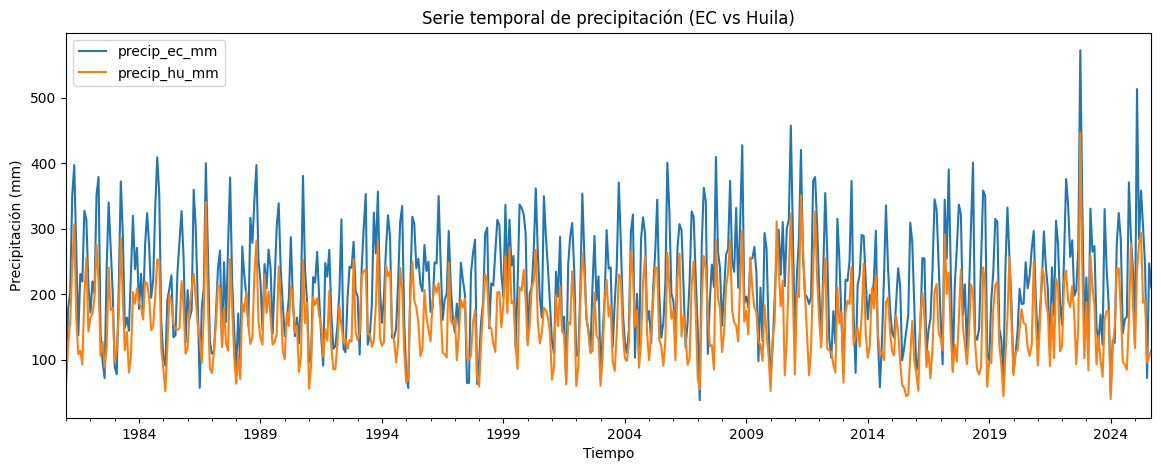

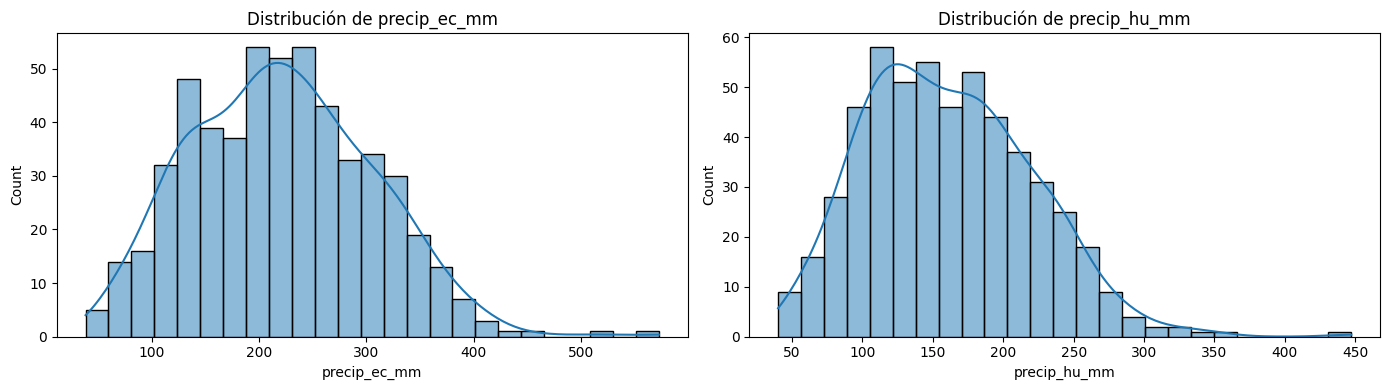

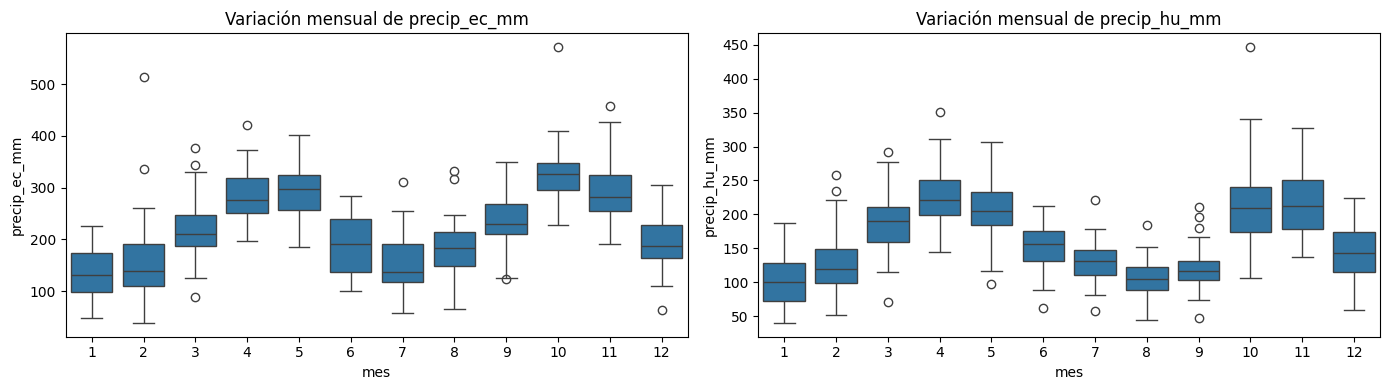

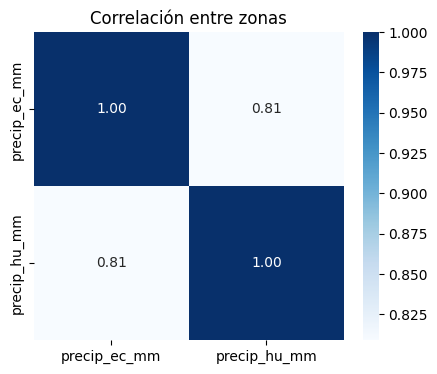

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("=== ENTENDIMIENTO DE LOS DATOS ===\n")

# -------------------------------------------------------------
# 1. Información general del dataset
# -------------------------------------------------------------
print("1. Información general:")
print(df.info(), "\n")

# -------------------------------------------------------------
# 2. Estadísticas descriptivas
# -------------------------------------------------------------
print("2. Estadísticas descriptivas:")
print(df.describe(), "\n")

# -------------------------------------------------------------
# 3. Exploración inicial de la serie
# -------------------------------------------------------------
print("3. Primeras y últimas filas:")
display(df.head())
display(df.tail())

# -------------------------------------------------------------
# 4. Visualización temporal
# -------------------------------------------------------------
df.plot(figsize=(14,5), title="Serie temporal de precipitación (EC vs Huila)")
plt.xlabel("Tiempo")
plt.ylabel("Precipitación (mm)")
plt.show()

# -------------------------------------------------------------
# 5. Distribución de las variables
# -------------------------------------------------------------
plt.figure(figsize=(14,4))
for i, col in enumerate(df.columns):
    plt.subplot(1, 2, i+1)
    sns.histplot(df[col], kde=True, bins=25)
    plt.title(f"Distribución de {col}")
plt.tight_layout()
plt.show()

# -------------------------------------------------------------
# 6. Boxplot para detectar estacionalidad y dispersión
# -------------------------------------------------------------
df_box = df.copy()
df_box['mes'] = df_box.index.month

plt.figure(figsize=(14,4))
for i, col in enumerate(['precip_ec_mm', 'precip_hu_mm']):
    plt.subplot(1, 2, i+1)
    sns.boxplot(x='mes', y=col, data=df_box)
    plt.title(f"Variación mensual de {col}")
plt.tight_layout()
plt.show()

# -------------------------------------------------------------
# 7. Matriz de correlación
# -------------------------------------------------------------
plt.figure(figsize=(5,4))
sns.heatmap(df.corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title("Correlación entre zonas")
plt.show()
